#Feed Forward Neural Network

In this module, we will see the classification of the MNIST dataset using a logistic regression classifier. 

First we will import the packages needed for classification in sklearn.linear_model. The final accuracy is measured using the sklearn.metrics. Luckily, Keras already provides the MNIST dataset in keras.datasets.mnist.

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.


Now, we will load the datasets into four variables.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


We will reshape the data so that it can be classified by the model.

In [0]:
image_vector = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector)
x_test = x_test.reshape(x_test.shape[0], image_vector)

To improve the performance, we normalise the data. This is done by dividing the data by 255, because the value of each pixel is in the range of 0 and 255. This will put each value between 0 and 1.

In [0]:
x_train = x_train/255
x_test = x_test/255

The output layer is a set of 10 perceptrons, out of whichone will be true(1), and the rest will be false(0). So we need to change the labels as such.

In [0]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
print("First five categories are as follows:\n", y_train[:5])

First five categories are as follows:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Now, we will initiate the neural network.

In [0]:
image_size = 784
num_classes = 10

In [8]:
model = Sequential()
model.add(Dense(units=32, activation="sigmoid", input_shape=(image_size,)))
model.add(Dense(units=100, activation="relu"))
model.add(Dropout(1-0.9))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 39,530
Trainable params: 39,530
Non-trainable params: 0
_________________

Now we train and make a graph of the accuracy of the model for each epoch for easier visualisation.

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 82us/step - loss: 2.2490 - acc: 0.2163 - val_loss: 2.1662 - val_acc: 0.3722
Epoch 2/50
54000/54000 [==============================] - 2s 37us/step - loss: 2.0171 - acc: 0.3810 - val_loss: 1.7726 - val_acc: 0.4687
Epoch 3/50
54000/54000 [==============================] - 2s 38us/step - loss: 1.5481 - acc: 0.5236 - val_loss: 1.2312 - val_acc: 0.6605
Epoch 4/50
54000/54000 [==============================] - 2s 37us/step - loss: 1.1231 - acc: 0.6554 - val_loss: 0.8639 - val_acc: 0.7775
Epoch 5/50
54000/54000 [==============================] - 2s 37us/step - loss: 0.8620 - acc: 0.7380 - val_loss: 0.6566 - val_acc: 0.8332
Epoch 6/50
54000/54000 [==============================] - 2s 37us/step - loss: 0.7134 - acc: 0.7849 - val_loss: 0.5388 - val_acc: 0.8607
Epoch 7/50
54000/54000 [==============================] - 2s 38us/step - loss: 0.

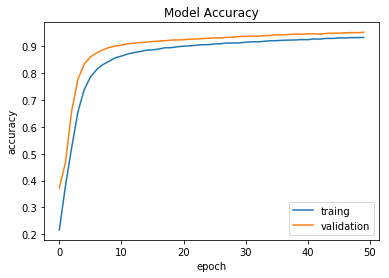

Test Loss: 0.201
Test Accuracy: 0.939


In [9]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", 
              metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=1,
                   validation_split=.1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['traing', 'validation'], loc='best')
plt.show()

print(f'Test Loss: {loss:.3}')
print(f'Test Accuracy: {accuracy:.3}')